# LMs-WATs

In [26]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import textstat

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [53]:
#WATs = ['Paragraph','Rephrase','Grammarly','ChatGPT','Wordtune','Quillbot']
WATs = ['Rephrase','Grammarly','ChatGPT','Wordtune','Quillbot']

df1 = pd.read_csv('/Users/carina/Downloads/courses/final thesis/precessed data/ex2/similarity/cos/cos_ALBERT.csv')
df1 = df1.drop(df1.columns[0],axis=1)
df1.columns = WATs
df2 = pd.read_csv('/Users/carina/Downloads/courses/final thesis/precessed data/ex2/similarity/cos/cos_senBERT.csv')
df2 = df2.drop(df2.columns[0],axis=1)
df2.columns = WATs
df3 = pd.read_csv('/Users/carina/Downloads/courses/final thesis/precessed data/ex2/similarity/euc/euc_ALBERT.csv')
df3 = df3.drop(df3.columns[0],axis=1)
df3.columns = WATs
df4 = pd.read_csv('/Users/carina/Downloads/courses/final thesis/precessed data/ex2/similarity/euc/euc_senBERT.csv')
df4 = df4.drop(df4.columns[0],axis=1)
df4.columns = WATs
df5 = pd.read_csv('/Users/carina/Downloads/courses/final thesis/precessed data/ex2/similarity/euc1/euc1_ALBERT.csv')
df5 = df5.drop(df5.columns[0],axis=1)
df5.columns = WATs
df6 = pd.read_csv('/Users/carina/Downloads/courses/final thesis/precessed data/ex2/similarity/euc1/euc1_senBERT.csv')
df6 = df6.drop(df6.columns[0],axis=1)
df6.columns = WATs

In [54]:
df_sim = pd.DataFrame()
heads = df1.columns.values.tolist()
source = ['NLP paper','Literature','News','Encyclopedias','Social Media','Speeches','Interview','Instruction Manuals']

LM_WAT = []
data_source = []
sim = []
WATs = []
LMs = []
for head in heads:
    
    tem_LM1_sim = df1[head].tolist()
    tem_LM2_sim = df2[head].tolist()
    
    category_LM1 = 'ALBERT-' + head
    category_LM2 = 'senBERT-' + head
    tem_LM1_WAT = [category_LM1] * 60
    tem_LM2_WAT = [category_LM2] * 60
    tem_LM_WAT = tem_LM1_WAT + tem_LM2_WAT
    
    LM1 = ['ALBERT']*60
    LM2 = ['senBERT']*60
    LM = LM1 +  LM2
    
    WAT = [head]*120
    
    i = 0
    
    for i in range(8):
        datasource = [source[i]] * 120
        j = 0

        for j in range(60):
            tem_index = i * 60 + j
            sim.append(tem_LM1_sim[tem_index])
        
        j = 0

        for j in range(60):
            tem_index = i * 60 + j
            sim.append(tem_LM2_sim[tem_index])

        data_source = data_source + datasource
        LM_WAT = LM_WAT + tem_LM_WAT
        WATs = WATs + WAT
        LMs = LMs + LM

        
df_sim['cos_sim'] = sim
df_sim['datasource'] = data_source
df_sim['LM-WAT'] = LM_WAT
df_sim['WATs'] = WATs
df_sim['LM'] = LMs

In [55]:
df_euc = pd.DataFrame()
heads = df1.columns.values.tolist()
source = ['NLP paper','Literature','News','Encyclopedias','Social Media','Speeches','Interview','Instruction Manuals']

LM_WAT = []
data_source = []
euc = []
WATs = []
LMs = []
for head in heads:
    
    tem_LM1_euc = df2[head].tolist()
    tem_LM2_euc = df4[head].tolist()
    WAT = [head]*120
    
    category_LM1 = 'ALBERT-' + head
    category_LM2 = 'senBERT-' + head
    tem_LM1_WAT = [category_LM1] * 60
    tem_LM2_WAT = [category_LM2] * 60
    tem_LM_WAT = tem_LM1_WAT + tem_LM2_WAT
    
    LM1 = ['ALBERT']*60
    LM2 = ['senBERT']*60
    LM = LM1 +  LM2
    
    i = 0
    
    for i in range(8):
        datasource = [source[i]] * 120
        j = 0

        for j in range(60):
            tem_index = i * 60 + j
            euc.append(tem_LM1_euc[tem_index])
        
        j = 0

        for j in range(60):
            tem_index = i * 60 + j
            euc.append(tem_LM2_euc[tem_index])

        data_source = data_source + datasource
        LM_WAT = LM_WAT + tem_LM_WAT
        WATs = WATs + WAT
        LMs = LMs + LM
        
df_euc['euc-dis'] = euc
df_euc['datasource'] = data_source
df_euc['LM-WAT'] = LM_WAT
df_euc['WATs'] = WATs
df_euc['LM'] = LMs

In [56]:
df_unnorm_euc = pd.DataFrame()
heads = df1.columns.values.tolist()
source = ['NLP paper','Literature','News','Encyclopedias','Social Media','Speeches','Interview','Instruction Manuals']

LM_WAT = []
data_source = []
euc = []
WATs = []
LMs = []
for head in heads:
    
    tem_LM1_euc = df2[head].tolist()
    tem_LM2_euc = df6[head].tolist()
    
    category_LM1 = 'ALBERT-' + head
    category_LM2 = 'senBERT-' + head
    tem_LM1_WAT = [category_LM1] * 60
    tem_LM2_WAT = [category_LM2] * 60
    tem_LM_WAT = tem_LM1_WAT + tem_LM2_WAT
    
    LM1 = ['ALBERT']*60
    LM2 = ['senBERT']*60
    LM = LM1 +  LM2
    
    WAT = [head]*120
    
    i = 0
    
    for i in range(8):
        datasource = [source[i]] * 120
        j = 0

        for j in range(60):
            tem_index = i * 60 + j
            euc.append(tem_LM1_euc[tem_index])
        
        j = 0

        for j in range(60):
            tem_index = i * 60 + j
            euc.append(tem_LM2_euc[tem_index])

        data_source = data_source + datasource
        LM_WAT = LM_WAT + tem_LM_WAT
        WATs = WATs + WAT
        LMs = LMs + LM
        
df_unnorm_euc['unnormeuc-dis'] = euc
df_unnorm_euc['datasource'] = data_source
df_unnorm_euc['LM-WAT'] = LM_WAT
df_unnorm_euc['WATs'] = WATs
df_unnorm_euc['LM'] = LMs

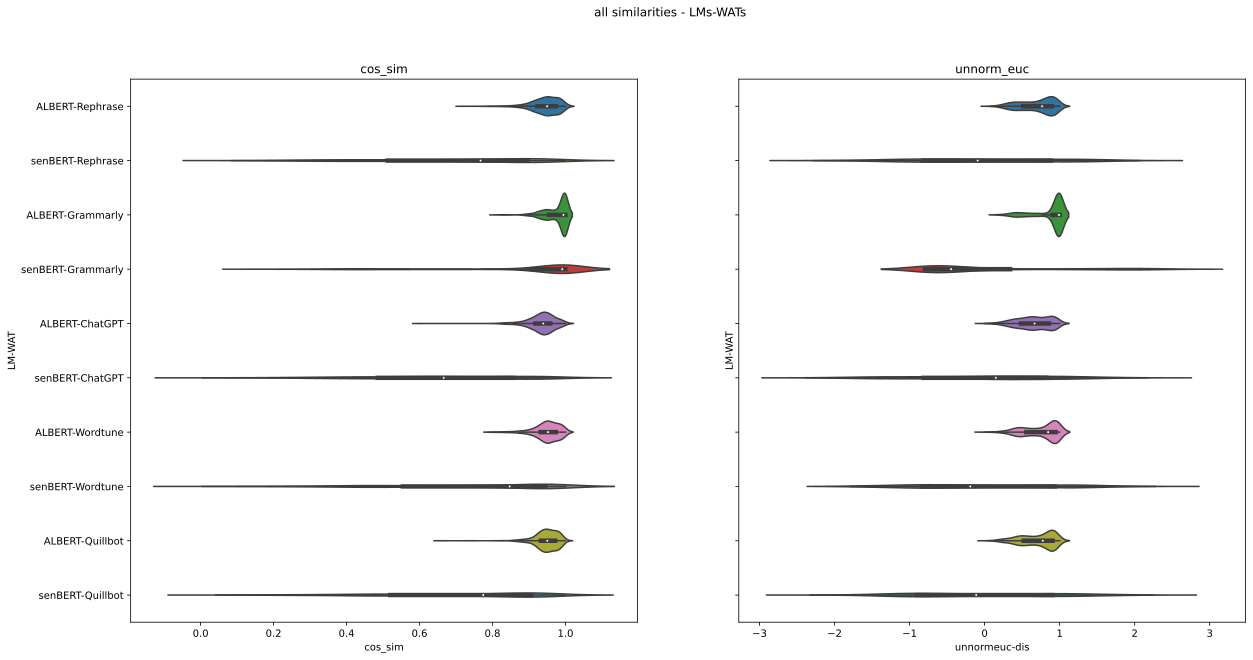

In [57]:
orders = ['ALBERT','senBERT']
my_pal = {"senBERT": "g", "ALBERT": "b"}

fig, axs = plt.subplots(1, 2, figsize=(20,10), sharey=True, sharex=False)
fig.suptitle('all similarities - LMs-WATs')

sns.violinplot(y="LM-WAT", x="cos_sim", data=df_sim, vert = False,showmeans=False,
                       showmedians=False, showextrema=False,ax=axs[0])
axs[0].set_title('cos_sim')

sns.violinplot(y="LM-WAT", x="unnormeuc-dis", data=df_unnorm_euc, vert=False, showmeans=False,
                       showmedians=False, showextrema=False, ax=axs[1])
axs[1].set_title('unnorm_euc')

'''sns.violinplot(y="LM-WAT", x="euc-dis", data=df_euc, vert=False, showmeans=False,
                       showmedians=False, showextrema=False,ax=axs[2])
axs[2].set_title('euc')'''
plt.savefig('/Users/carina/Downloads/Water-pause-times.svg',format='svg', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题

plt.show()

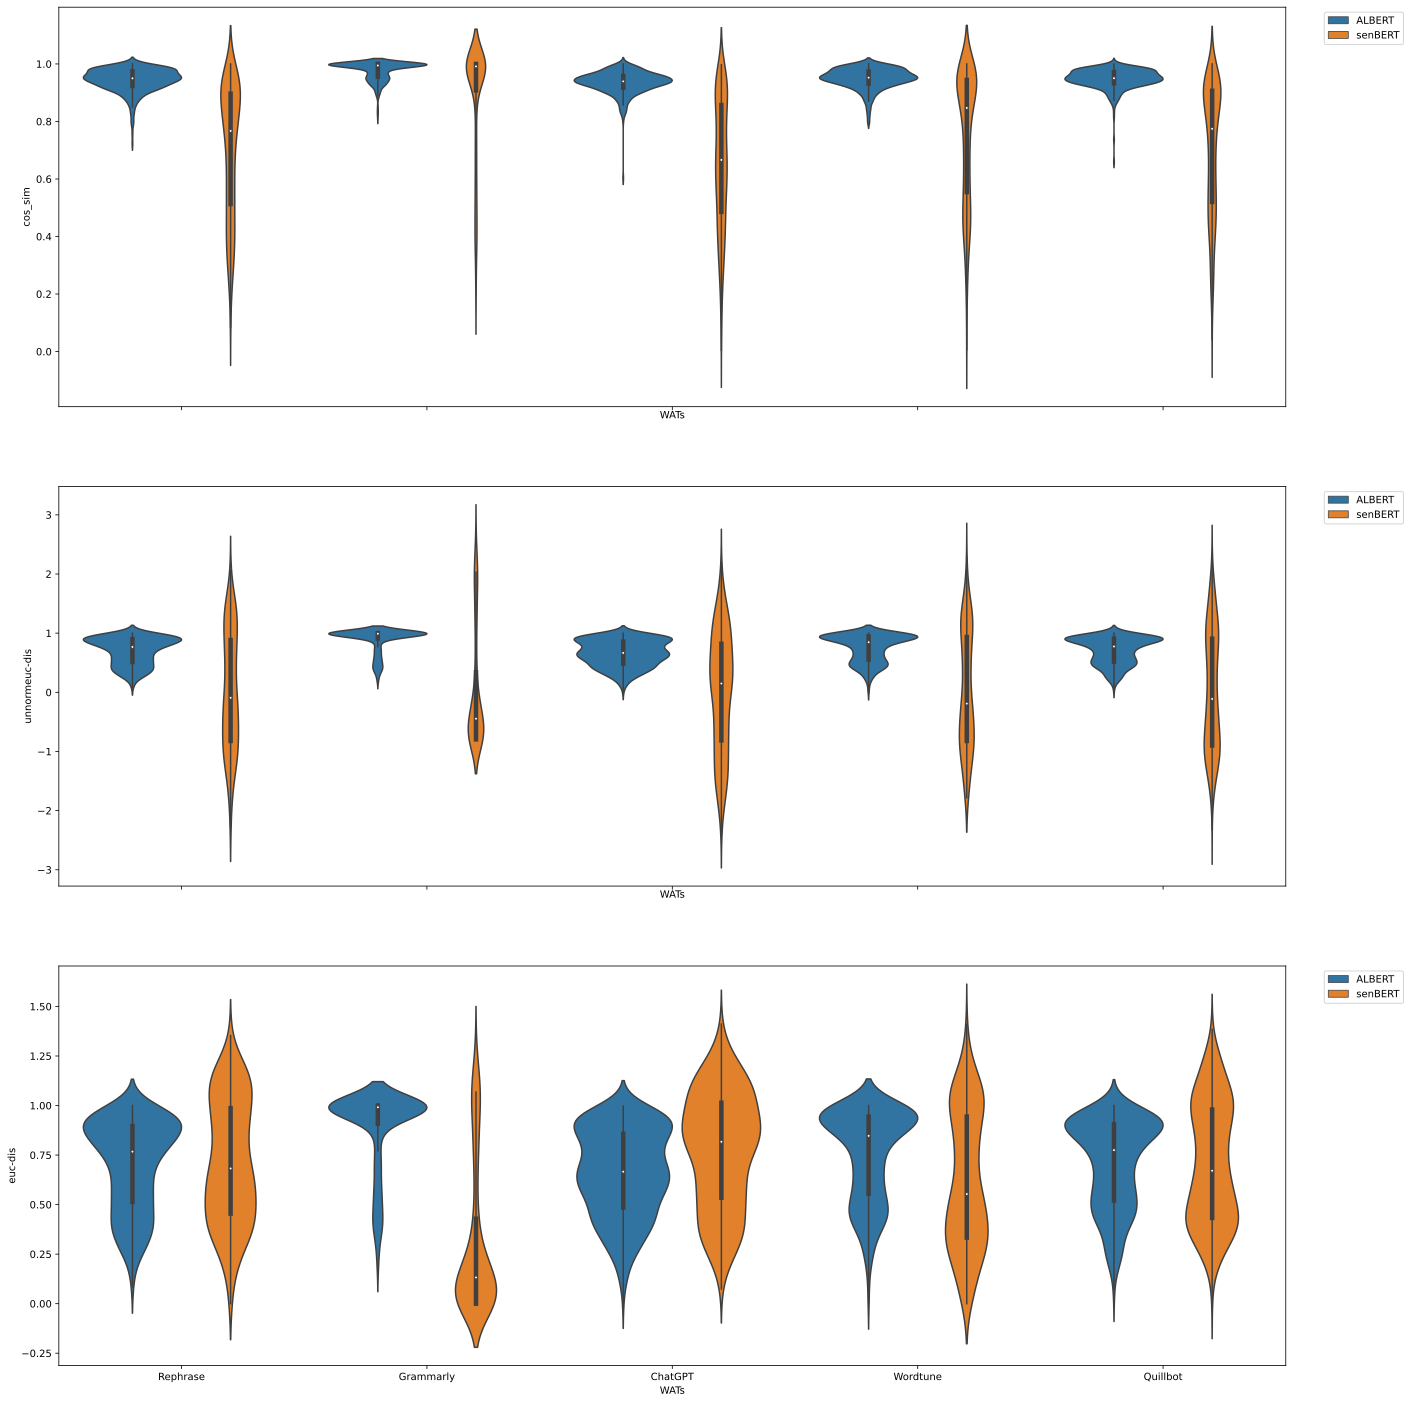

In [58]:
f, axes = plt.subplots(3, 1,sharex=True, figsize=(22,25))

orders = ['ALBERT','senBERT']
my_pal = {"senBERT": "g", "ALBERT": "b"}

a = sns.violinplot(y="cos_sim",x= "WATs",hue="LM", data=df_sim,ax=axes[0])
a.legend (bbox_to_anchor = (1.1, 1))
b = sns.violinplot(y="unnormeuc-dis",x= "WATs",hue="LM", data=df_unnorm_euc,ax=axes[1])
b.legend (bbox_to_anchor = (1.1, 1))
c= sns.violinplot(y="euc-dis",x= "WATs",hue="LM", data=df_euc,ax=axes[2])
c.legend (bbox_to_anchor = (1.1, 1))

# cos&unnormalizedeuc&euc LM-WATs datasource violin

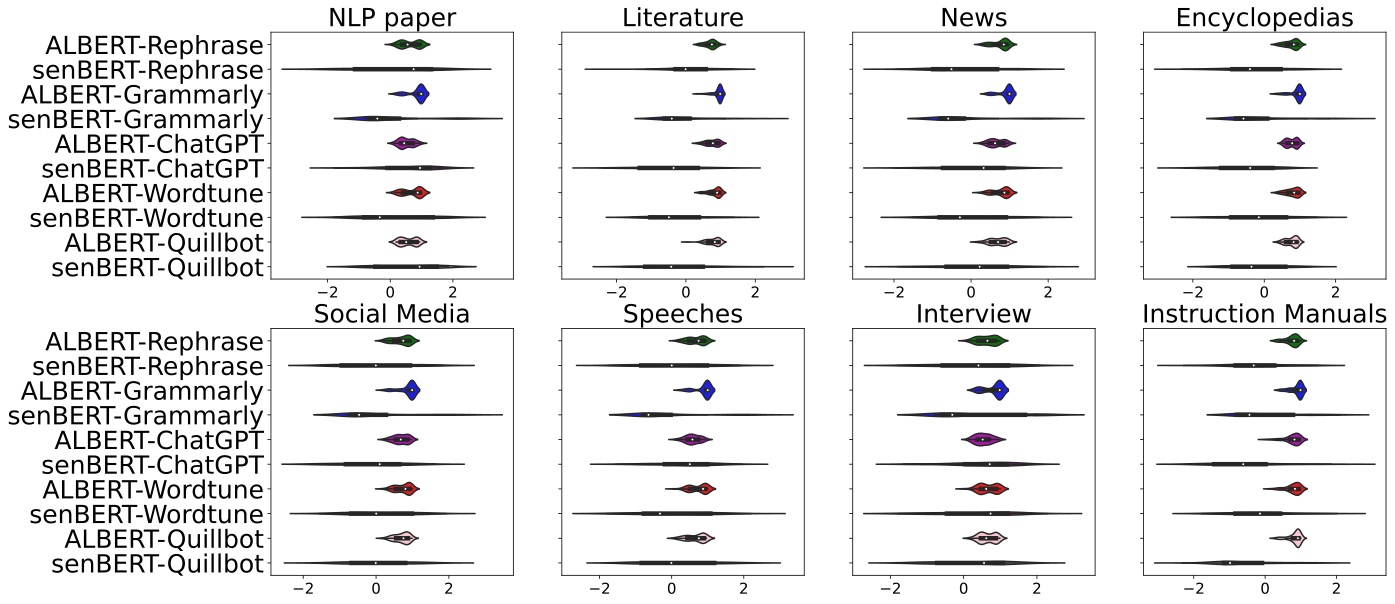

'fig, axs = plt.subplots(2, 4, figsize=(20,10), sharey=True, sharex=False)\nfig.suptitle(\'euc distance - LMs-WATs\')\nfor i in range(2):\n    for j in range(4):\n        p = i * 4 + j\n        subtitle = source[p]\n        tem_Df = df_euc[df_euc[\'datasource\'] == subtitle]\n\n        sns.violinplot(y="LM-WAT", x="euc-dis", data=tem_Df, vert=False, showmeans=False,\n                       showmedians=False, showextrema=False, ax=axs[i][j], palette=my_pal)\n\n        axs[i][j].set_title(subtitle)\n\nplt.show()'

In [62]:
orders = ['ALBERT-Paragraph','senBERT-Paragraph','ALBERT-Rephrase','senBERT-Rephrase','ALBERT-Grammarly','senBERT-Grammarly','ALBERT-ChatGPT','senBERT-ChatGPT','ALBERT-Wordtune','senBERT-Wordtune','ALBERT-Quillbot','senBERT-Quillbot']
my_pal = {'ALBERT-Paragraph': "c",'senBERT-Paragraph': "c","ALBERT-Rephrase": "g", "ALBERT-Grammarly": "b", "ALBERT-ChatGPT":"m","ALBERT-Wordtune":"r","ALBERT-Quillbot":"pink","senBERT-Rephrase": "g", "senBERT-Grammarly": "b", "senBERT-ChatGPT":"m","senBERT-Wordtune":"r","senBERT-Quillbot":"pink"}

'''fig, axs = plt.subplots(2, 4, figsize=(20,10), sharey=True, sharex=False)
#fig.suptitle('Cosine similarity - LMs-WATs')

for i in range(2):
    for j in range(4):
        p = i * 4 + j
        subtitle = source[p]
        tem_Df = df_sim[df_sim['datasource'] == subtitle]

        sns.violinplot(y="LM-WAT", x="cos_sim", data=tem_Df, vert=False, showmeans=False,
                       showmedians=False, showextrema=False, ax=axs[i][j], palette=my_pal)
        axs[i][j].set_xlabel("")
        axs[i][j].set_ylabel("")

        #axs[i][j].set_yticklabels(fontproperties = 'Times New Roman', size = 320)
        #axs[i][j].set_xticklabels([],fontproperties = 'Times New Roman', size = 20)
        axs[i][j].tick_params(axis="x", labelsize=15)
        axs[i][j].tick_params(axis="y", labelsize=25)

        axs[i][j].set_title(subtitle,size=25)
plt.savefig('/Users/carina/Downloads/courses/final thesis/figures of results/sentence/central simi/cosine similarity.pdf', format = 'pdf',dpi = 500,bbox_inches='tight')
plt.show()'''

fig, axs = plt.subplots(2, 4, figsize=(20,10), sharey=True, sharex=False)
#fig.suptitle('unnormeuc distance - LMs-WATs')
for i in range(2):
    for j in range(4):
        p = i * 4 + j
        subtitle = source[p]
        tem_Df = df_unnorm_euc[df_unnorm_euc['datasource'] == subtitle]

        sns.violinplot(y="LM-WAT", x="unnormeuc-dis", data=tem_Df, vert=False, showmeans=False,
                       showmedians=False, showextrema=False, ax=axs[i][j], palette=my_pal)
        axs[i][j].set_xlabel("")
        axs[i][j].set_ylabel("")

        #axs[i][j].set_yticklabels(fontproperties = 'Times New Roman', size = 320)
        #axs[i][j].set_xticklabels([],fontproperties = 'Times New Roman', size = 20)
        axs[i][j].tick_params(axis="x", labelsize=15)
        axs[i][j].tick_params(axis="y", labelsize=25)

        axs[i][j].set_title(subtitle,size=25)
plt.savefig('/Users/carina/Downloads/courses/final thesis/figures of results/sentence/central simi/euclidean distance.pdf', format = 'pdf',dpi = 500,bbox_inches='tight')
plt.show()

'''fig, axs = plt.subplots(2, 4, figsize=(20,10), sharey=True, sharex=False)
fig.suptitle('euc distance - LMs-WATs')
for i in range(2):
    for j in range(4):
        p = i * 4 + j
        subtitle = source[p]
        tem_Df = df_euc[df_euc['datasource'] == subtitle]

        sns.violinplot(y="LM-WAT", x="euc-dis", data=tem_Df, vert=False, showmeans=False,
                       showmedians=False, showextrema=False, ax=axs[i][j], palette=my_pal)

        axs[i][j].set_title(subtitle)

plt.show()'''

# cos&unnormalizedeuc&euc LM-WATs datasource boxplot

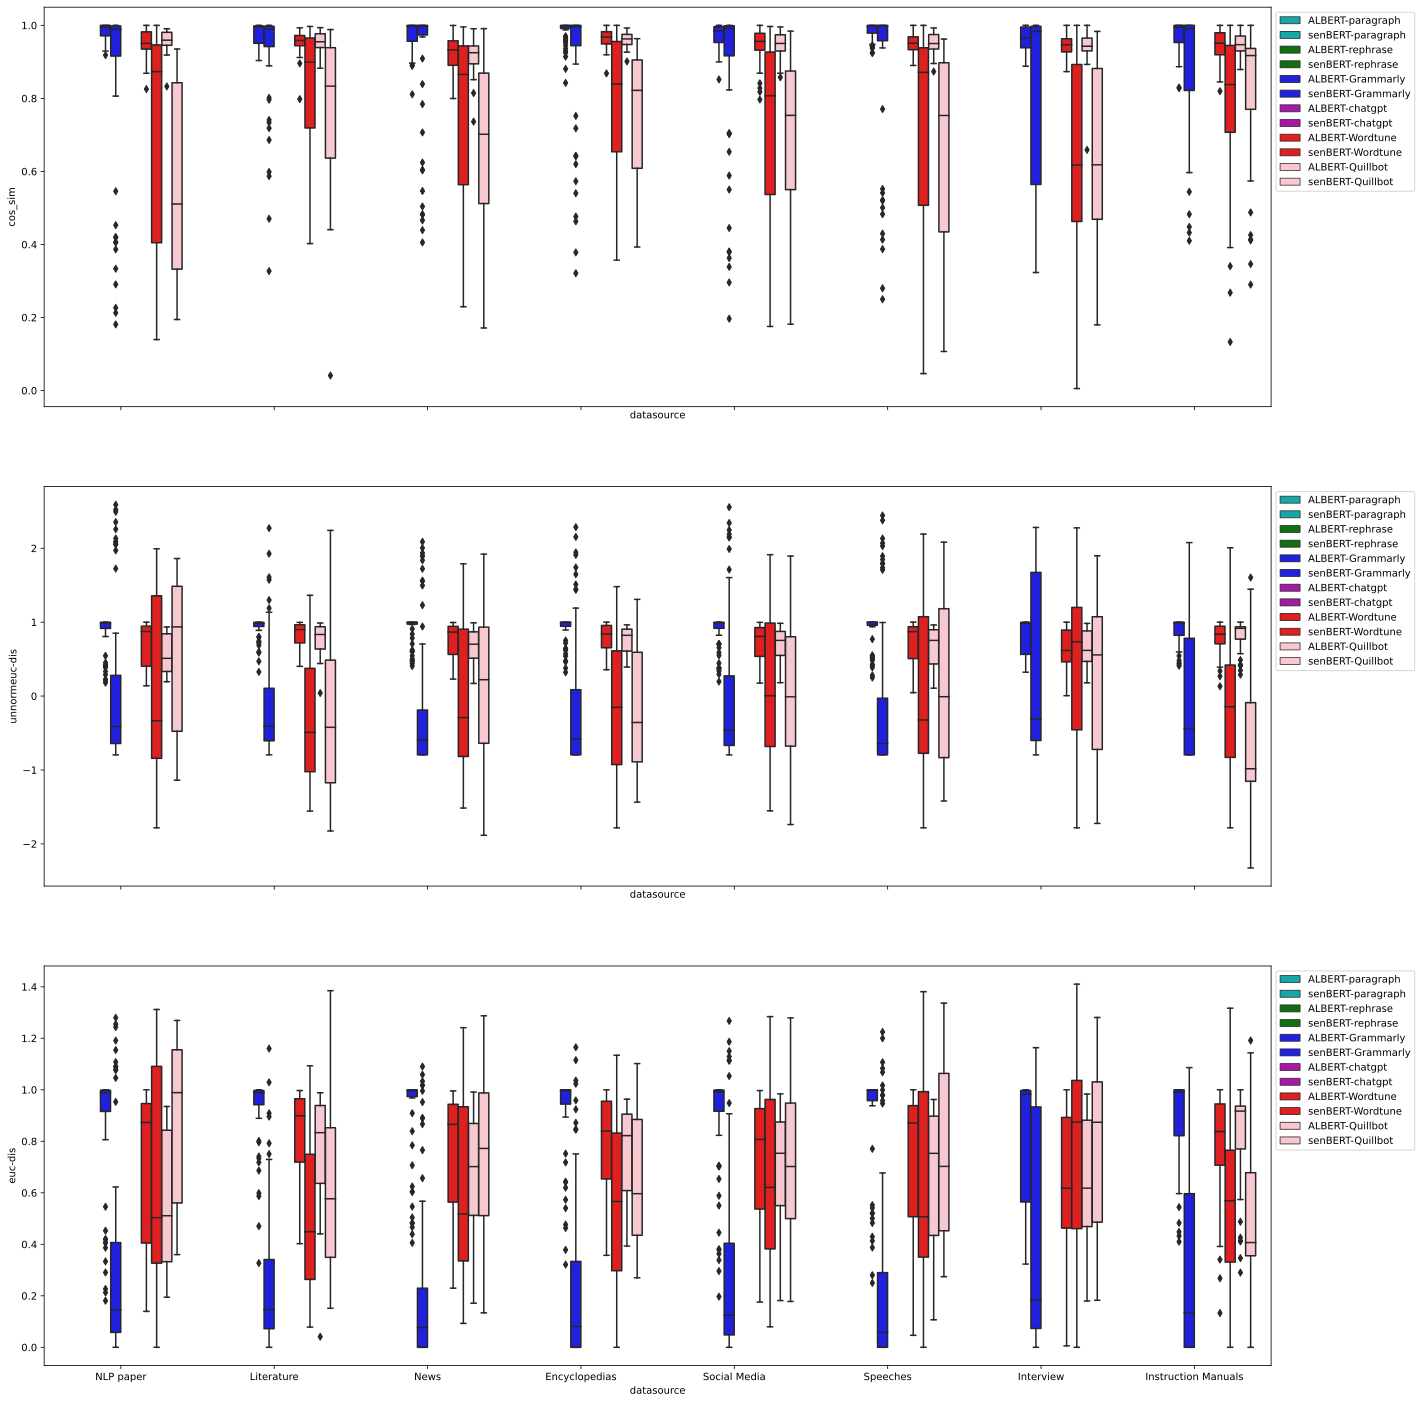

In [60]:
f, axes = plt.subplots(3, 1,sharex=True, figsize=(22,25))

orders = ['ALBERT-paragraph','senBERT-paragraph','ALBERT-rephrase','senBERT-rephrase','ALBERT-Grammarly','senBERT-Grammarly','ALBERT-chatgpt','senBERT-chatgpt','ALBERT-Wordtune','senBERT-Wordtune','ALBERT-Quillbot','senBERT-Quillbot']
my_pal = {'ALBERT-paragraph': "c",'senBERT-paragraph': "c","ALBERT-rephrase": "g", "ALBERT-Grammarly": "b", "ALBERT-chatgpt":"m","ALBERT-Wordtune":"r","ALBERT-Quillbot":"pink","senBERT-rephrase": "g", "senBERT-Grammarly": "b", "senBERT-chatgpt":"m","senBERT-Wordtune":"r","senBERT-Quillbot":"pink"}

a = sns.boxplot(y="cos_sim",x= "datasource",hue="LM-WAT", hue_order = orders,data=df_sim,ax=axes[0],palette=my_pal)
a.legend (bbox_to_anchor = (1, 1))
b = sns.boxplot(y="unnormeuc-dis",x= "datasource",hue="LM-WAT", hue_order = orders,data=df_unnorm_euc,ax=axes[1],palette=my_pal)
b.legend (bbox_to_anchor = (1, 1))
c= sns.boxplot(y="euc-dis",x= "datasource",hue="LM-WAT",hue_order = orders,data=df_euc,ax=axes[2],palette=my_pal)
c.legend (bbox_to_anchor = (1, 1))


# cos&unnormalizedeuc&euc LM-WATs datasource boxplot

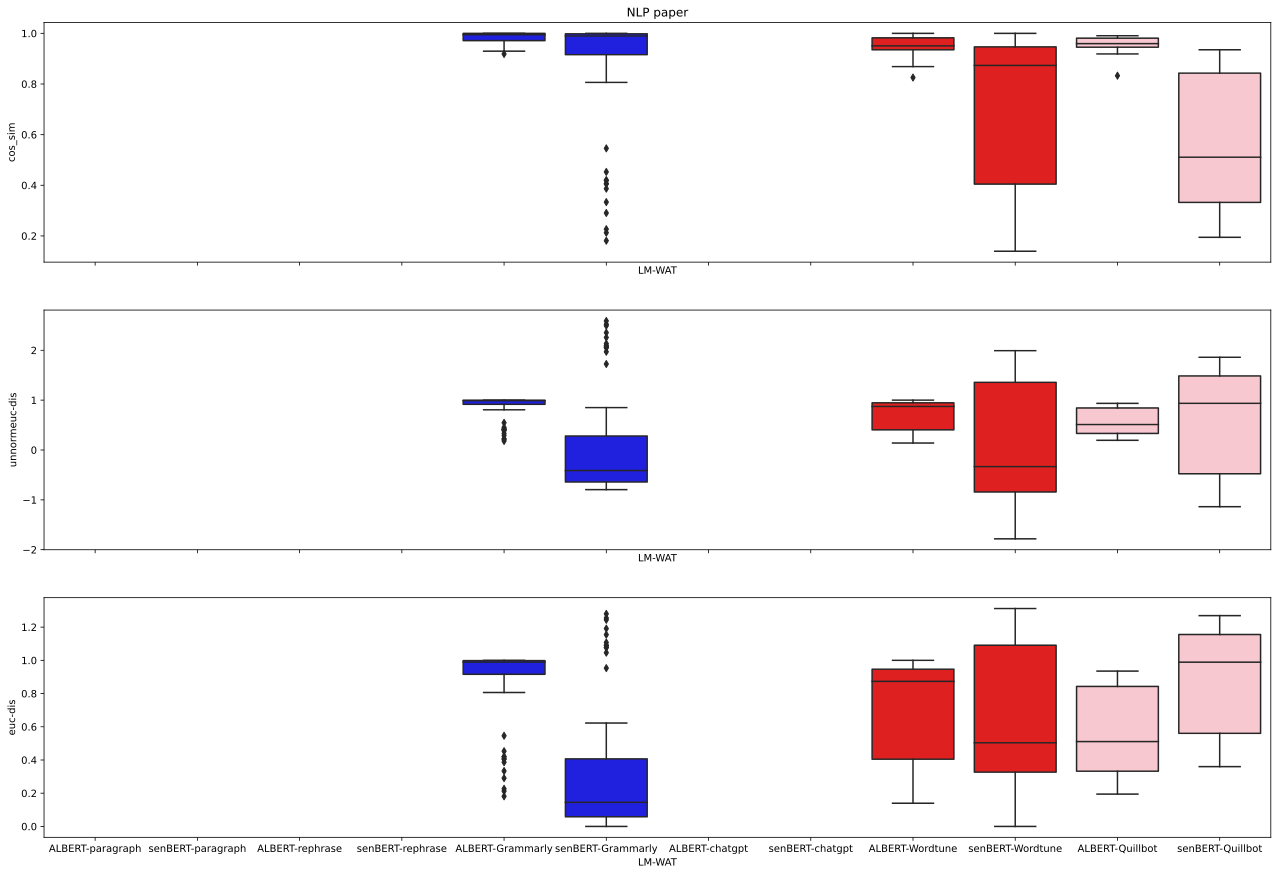

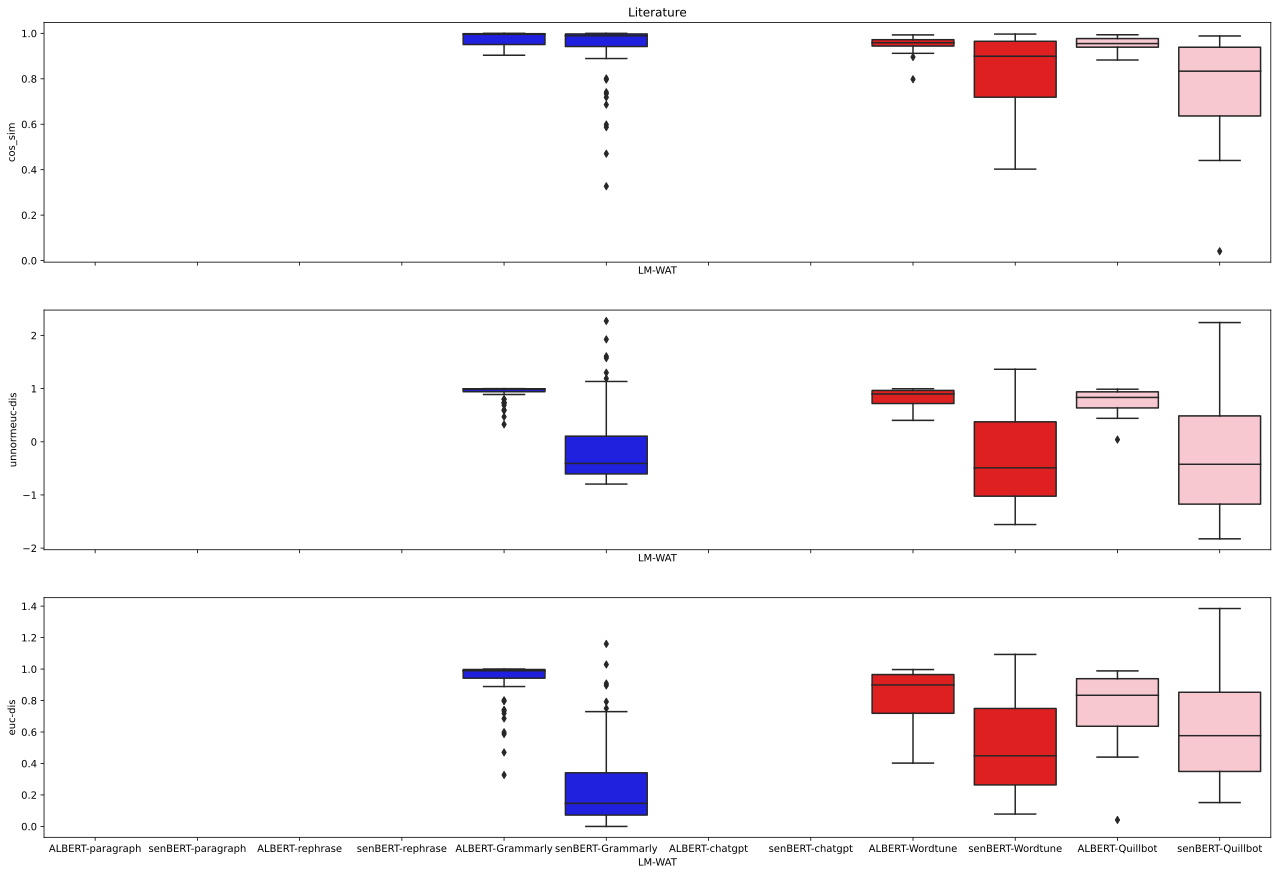

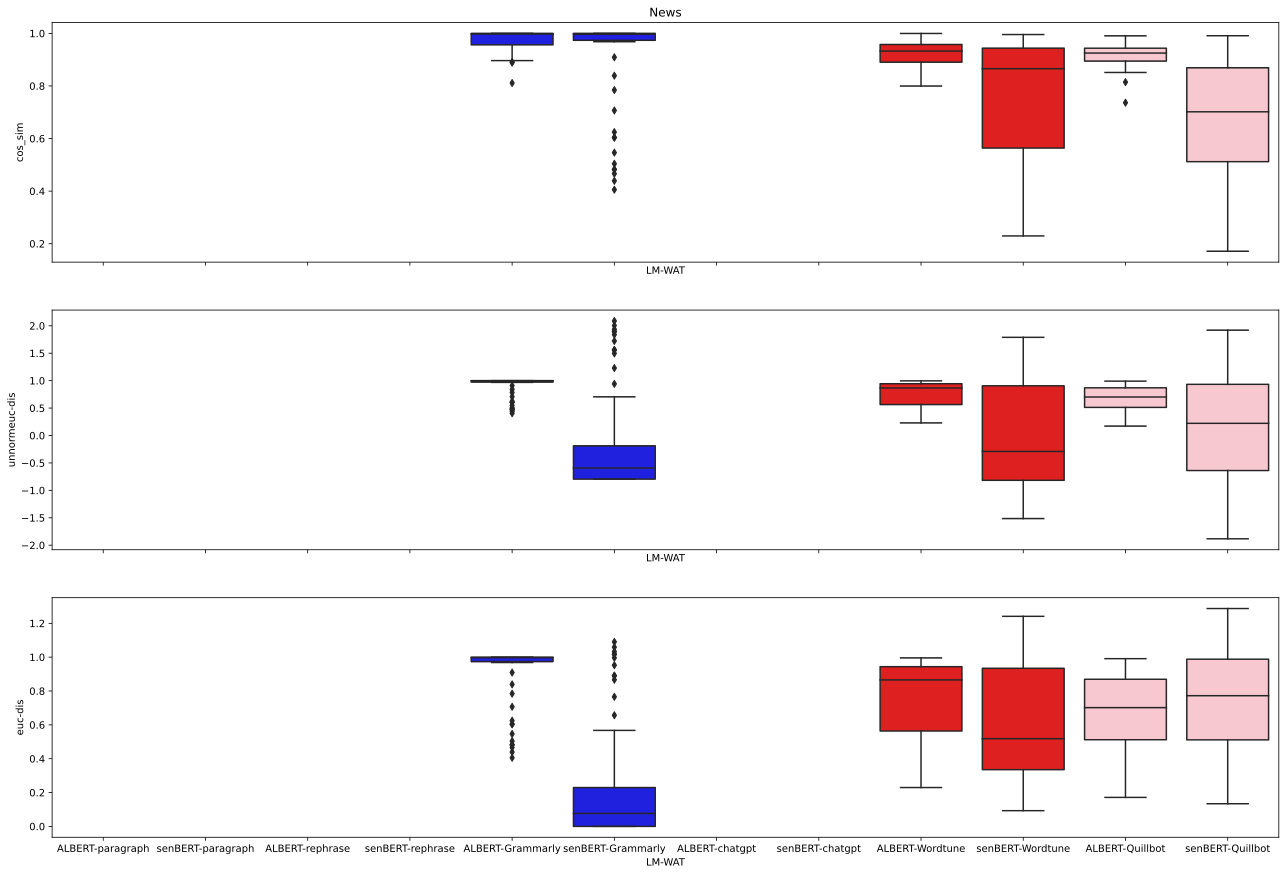

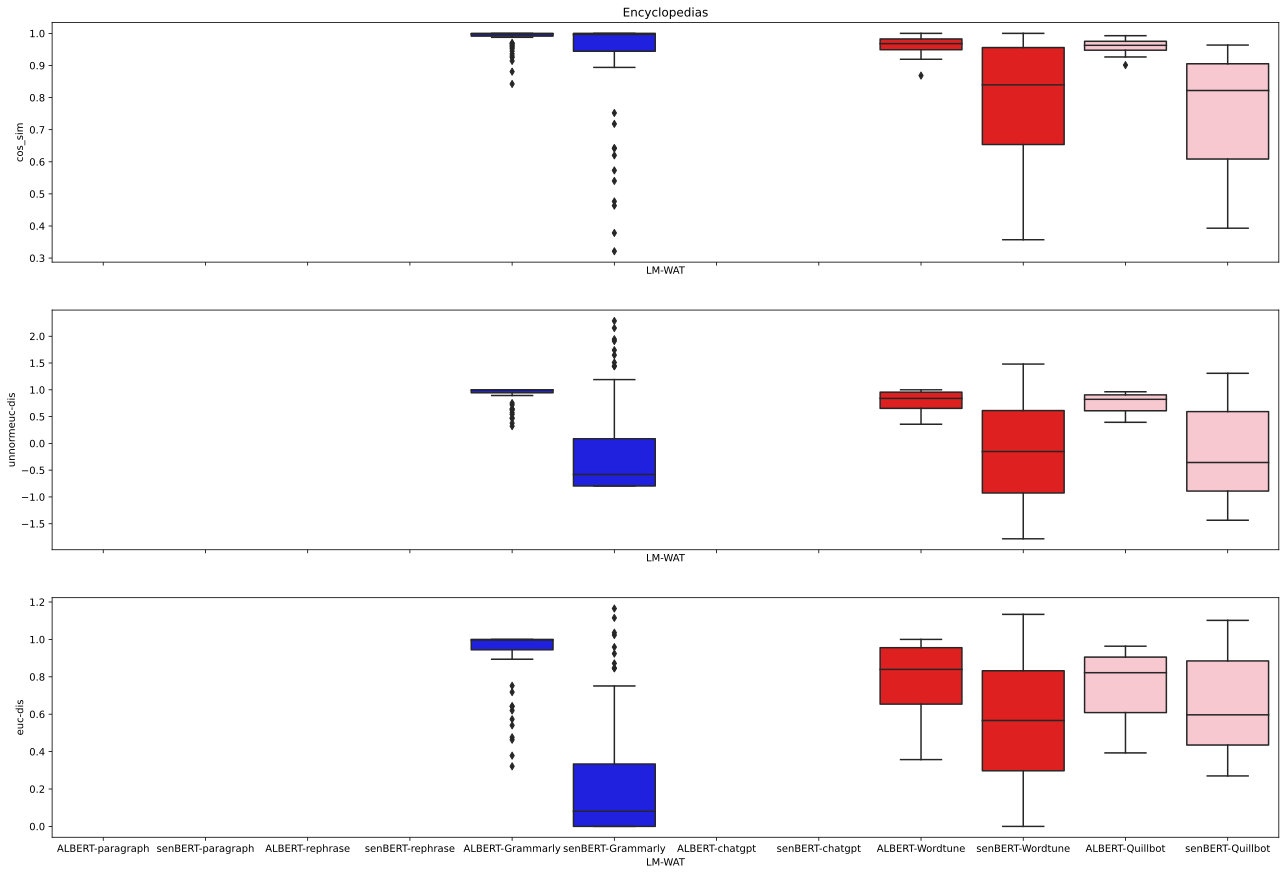

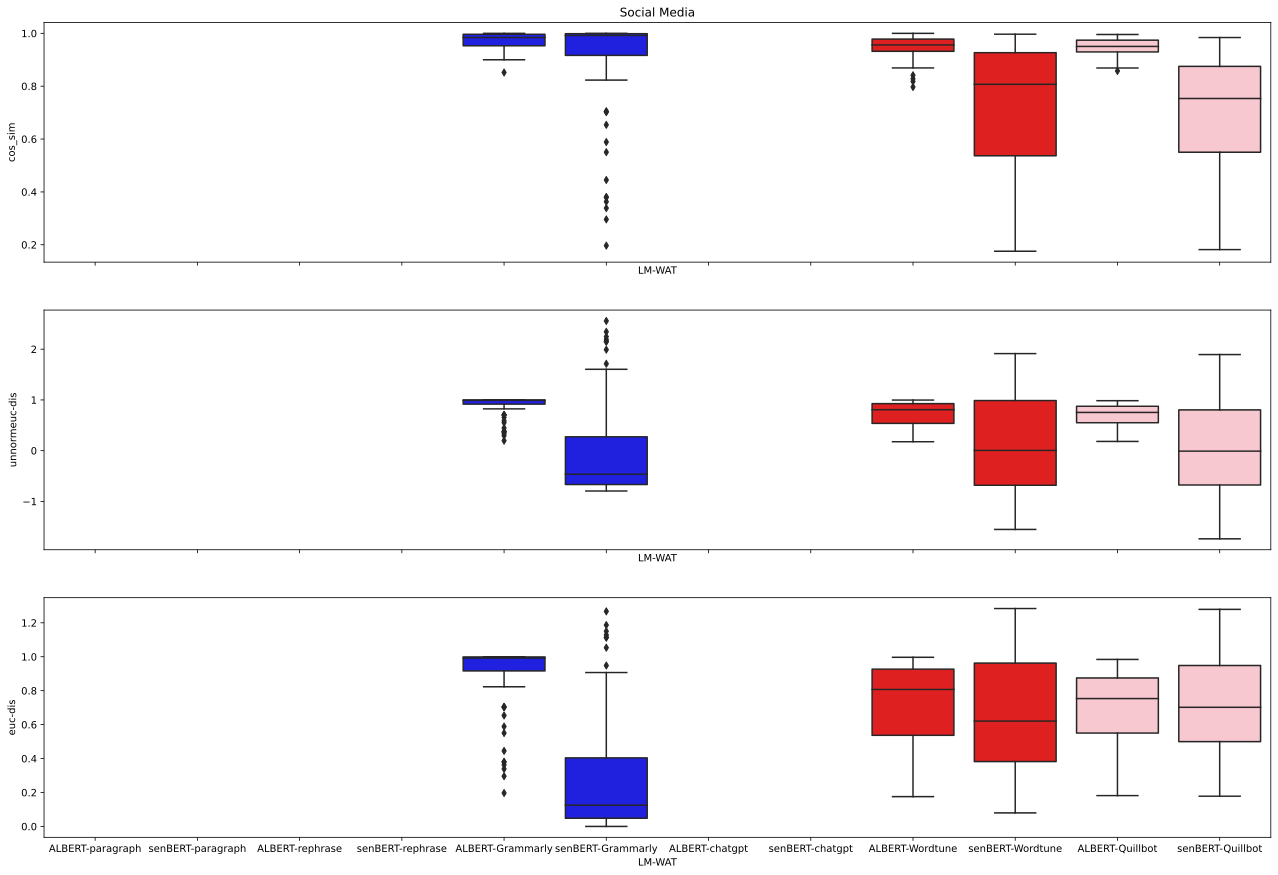

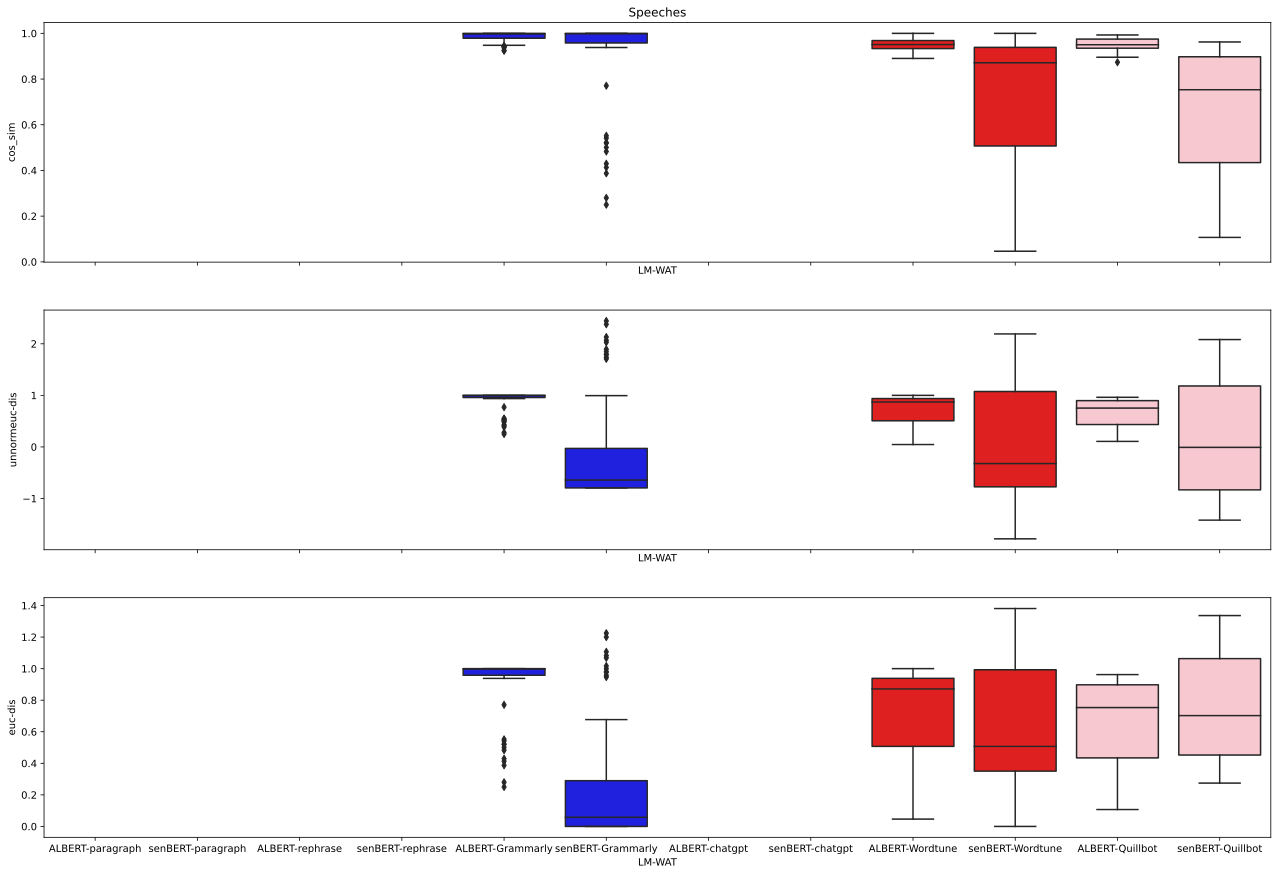

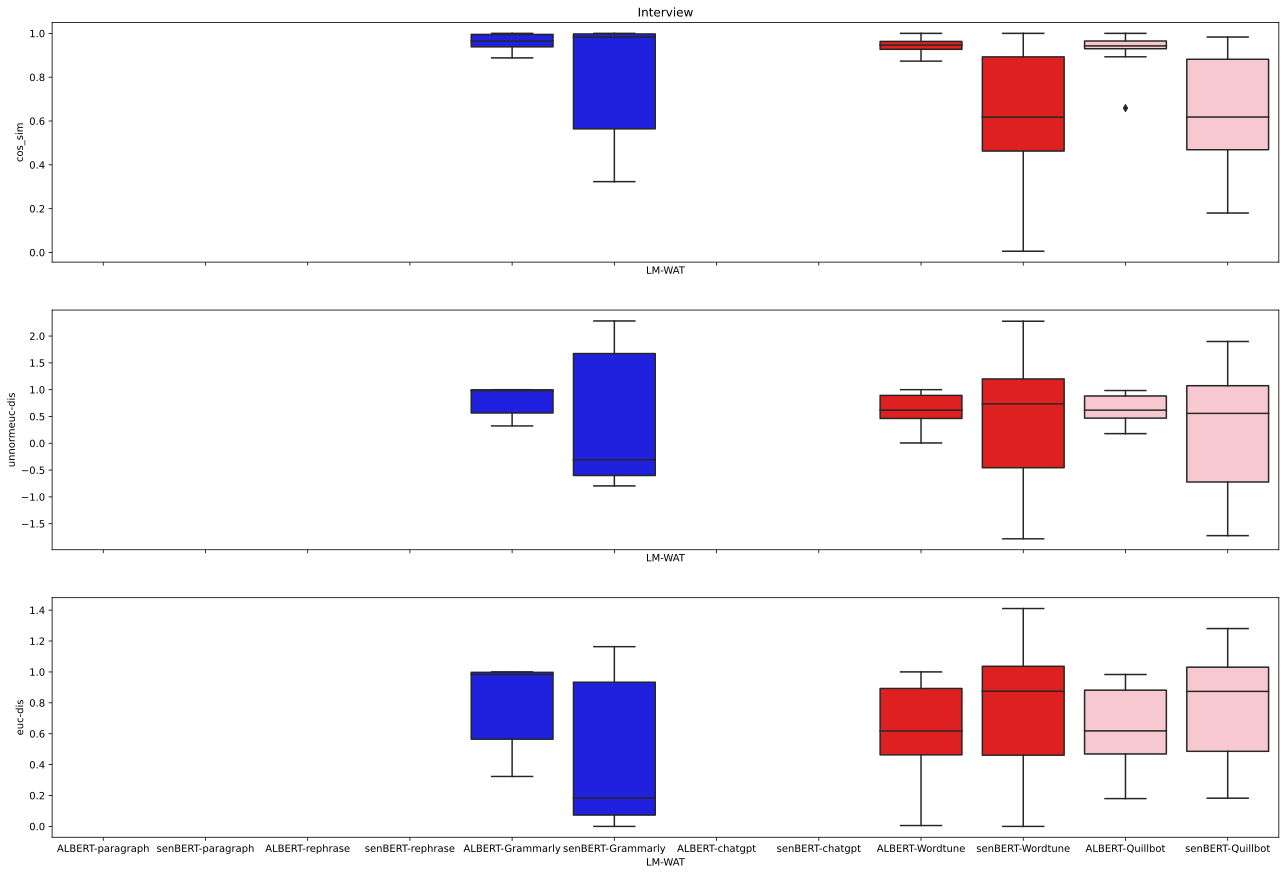

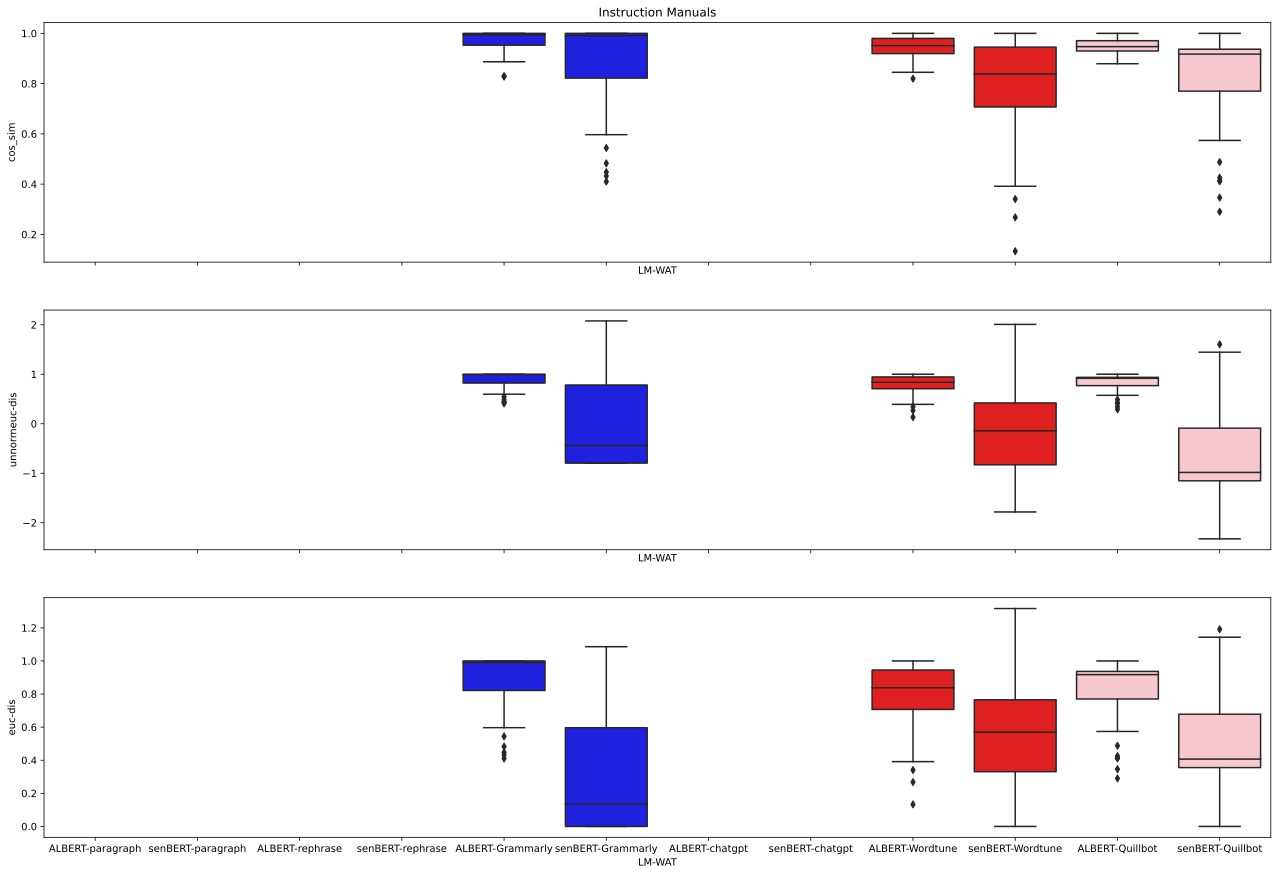

In [61]:
for item in source:
    #print(item)
    orders = ['ALBERT-paragraph','senBERT-paragraph','ALBERT-rephrase','senBERT-rephrase','ALBERT-Grammarly','senBERT-Grammarly','ALBERT-chatgpt','senBERT-chatgpt','ALBERT-Wordtune','senBERT-Wordtune','ALBERT-Quillbot','senBERT-Quillbot']
    f, axes = plt.subplots(3, 1,sharex=True, figsize=(22,15))

    df_box1 = df_sim[df_sim['datasource'] == item]
    df_box2 = df_euc[df_euc['datasource'] == item]
    df_box3 = df_unnorm_euc[df_unnorm_euc['datasource'] == item]

    a = sns.boxplot(y="cos_sim",x= "LM-WAT",order=orders,data=df_box1,ax=axes[0],palette=my_pal)
    a.set(title=item)
    b= sns.boxplot(y="euc-dis",x= "LM-WAT",order=orders,data=df_box2,ax=axes[2],palette=my_pal)
    c= sns.boxplot(y="unnormeuc-dis",x= "LM-WAT",order=orders,data=df_box3,ax=axes[1],palette=my_pal)